# Preprocessing and Modeling

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
#!pip install yfinance
#!pip install pmdarima

#### Load Data

In [3]:
# importing the yfinance package
import yfinance as yf

# giving the start and end dates
startDate = '2021-01-01'
endDate = '2023-12-31'

# set stock names and create dict
tech = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']
cars = ['TSLA', 'F', 'GM', 'TM', 'RACE']
health = ['PFE', 'JNJ', 'CVS', 'UNH', 'LLY']
finance = ['BAC', 'C', 'WFC', 'JPM', 'USB']
games = ['AMD', 'GME', 'NVDA', 'EA', 'RBLX']
companies = tech + cars + health + finance + games
stockData = {}

for name in companies:
    # downloading the data of the ticker value between
    # the start and end dates
    resultData = yf.download(name, startDate, endDate)
    # store data in dict
    stockData[name] = resultData.reset_index()

stockData['META'].head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
1,2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2,2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
3,2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
4,2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300


We know the data has the correct dtypes as well as no null values from our previous file.

We are only concerned mainly with the close price so let's seperate that column.

In [4]:
stockDataClose = {}

for stock in stockData:
    stockDataClose[stock] = stockData[stock][['Date', 'Close']]
    
stockDataClose['META'].head()

,Date,Close
0,2021-01-04,268.940002
1,2021-01-05,270.970001
2,2021-01-06,263.309998
3,2021-01-07,268.739990
4,2021-01-08,267.570007


We can run an Auto ARIMA function on every stock to first, find stationarity on our stock, and then make a prediction.

In [5]:
#train_data.shape, test_data.shape
#stockDataClose[stock].dtypes


ARIMA model for META
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4047.308, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4049.123, Time=0.08 sec


C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4051.051, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4052.339, Time=0.27 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4050.871, Time=0.19 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4052.519, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4049.119, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4051.039, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4051.937, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4051.976, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4052.494, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4051.048, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4052.999, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4050.916, Time=0.61 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4052.461, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4051.744, Time=0.31 sec
 ARIMA(3,1,2)(0

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2938.831, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2940.598, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2942.588, Time=0.18 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2943.800, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2940.061, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2940.619, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2940.657, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2942.596, Time=0.68 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2944.595, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2938.908, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2940.538, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2941.090, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2943.051, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2940.457, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2942.452, Time=0.31 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



ARIMA model for AMZN
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3106.991, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3108.985, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3110.899, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3112.872, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3113.643, Time=0.22 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3114.408, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3108.985, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3110.990, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3112.092, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3113.688, Time=0.34 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3114.310, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3110.893, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3112.122, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3110.244, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3109.257, Ti

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



ARIMA model for NFLX
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4710.831, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4712.163, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4713.964, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4715.024, Time=0.20 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4716.273, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4717.887, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4712.185, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4711.267, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4713.152, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4716.462, Time=0.43 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4717.787, Time=0.82 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4714.032, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4713.152, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4714.545, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4717.126, Ti

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2732.992, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2733.258, Time=0.14 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2735.167, Time=0.18 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2736.516, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2731.375, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2731.106, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2732.892, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2734.563, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2736.486, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2733.056, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2732.880, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2734.932, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2736.329, Time=0.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2733.512, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2734.559, Time=0.29 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4454.076, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4456.008, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4457.968, Time=0.25 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4458.186, Time=0.32 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4459.798, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4454.052, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4455.820, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4457.815, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4459.572, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4461.303, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4455.991, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4457.815, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4459.805, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4448.026, Time=0.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4457.910, Time=0.22 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=668.213, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=670.117, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=672.101, Time=0.15 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=673.764, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=666.237, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=667.524, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=669.831, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=672.116, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=673.258, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=668.219, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=670.217, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=670.894, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=672.849, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=670.114, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=671.520, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] i

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1919.126, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1920.920, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1922.824, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1922.500, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1924.151, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1926.112, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1920.925, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1921.185, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1921.627, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1922.783, Time=0.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1924.550, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.791, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1921.497, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1924.607, Time=0.51 sec
 ARIMA(3,1,0)(0

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2790.242, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2792.229, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2793.864, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2795.862, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2797.861, Time=0.18 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2797.404, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2792.228, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2794.156, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2795.862, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2797.860, Time=0.21 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2799.386, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2793.864, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2795.863, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2797.864, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(3,1,0)(0

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3338.861, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3340.699, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3342.693, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3344.685, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3342.567, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3338.904, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3340.744, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3339.568, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3344.693, Time=0.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3342.743, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3340.698, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3342.697, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3344.697, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3342.940, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3342.697, Time=0.14 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



ARIMA model for PFE
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.484, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1417.374, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1419.186, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1415.298, Time=0.14 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1417.044, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1414.747, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1417.378, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1419.361, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1413.764, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1416.633, Time=0.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1418.625, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1419.135, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1413.516, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1417.659, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1414.364, Tim

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



ARIMA model for JNJ
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2347.507, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2347.959, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2349.738, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2349.752, Time=0.14 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2351.499, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2353.259, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2347.896, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2349.254, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2351.216, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2351.589, Time=0.31 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2352.662, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2349.616, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2351.223, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2351.825, Time=0.5

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2082.394, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2084.248, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2085.746, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2087.053, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2087.952, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2082.383, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2084.355, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2086.160, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2087.592, Time=0.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2088.494, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2084.283, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2086.202, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2083.733, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2078.013, Time=0.75 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2085.729, Time=0.08 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3964.322, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3966.315, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3968.148, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3970.031, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3972.023, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3964.317, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3966.274, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3968.260, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3970.104, Time=0.51 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3972.030, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3966.310, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3968.311, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3964.402, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3968.145, Time=0.19 sec
 ARIMA(3,1,1)(0

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3637.844, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3639.737, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3641.736, Time=0.21 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3643.682, Time=0.26 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3644.380, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3637.838, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3639.765, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3641.737, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3643.365, Time=0.47 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3645.109, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3639.735, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3641.735, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3643.323, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3643.960, Time=0.91 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3641.735, Time=0.09 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1245.532, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1246.878, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1248.288, Time=0.15 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1250.288, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1243.525, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1245.403, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1247.133, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1248.479, Time=0.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1250.288, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1245.523, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1247.525, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1248.836, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1244.545, Time=0.82 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1246.722, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1248.449, Time=0.27 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1775.876, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1777.801, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1772.999, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1774.973, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1776.973, Time=0.13 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1778.903, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1777.786, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1777.461, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1774.973, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1776.973, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1778.918, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1773.031, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1775.008, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1776.972, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1778.971, Time=0.28 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



ARIMA model for WFC
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1630.632, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1632.547, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1633.881, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1635.686, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1637.022, Time=0.15 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1638.965, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1632.541, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1633.766, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1635.342, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1637.304, Time=0.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1638.979, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1633.821, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1635.352, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2684.884, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2684.403, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2686.325, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2688.165, Time=0.14 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2689.369, Time=0.13 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2690.961, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2684.361, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2686.347, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2688.025, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2689.746, Time=0.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2691.179, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2686.342, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2688.137, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2689.443, Time=0.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2685.115, Time=0.45 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1647.458, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1649.295, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1651.230, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1653.138, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1655.113, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1654.499, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1649.291, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1650.891, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1653.294, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1654.612, Time=0.35 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1656.523, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1651.226, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1652.887, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1654.581, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(3,1,0)(0

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3121.188, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3122.993, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3124.167, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3126.143, Time=0.20 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3127.962, Time=0.22 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3129.955, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3123.008, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3124.706, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3126.155, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3127.839, Time=0.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3129.733, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3124.130, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3126.123, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\AppData\Local\Temp\ipykernel_28808\1459228774.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(15, 5))
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5286.538, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4851.765, Time=0.23 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4468.329, Time=0.60 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=4258.194, Time=0.51 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3457.973, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3439.489, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3439.335, Time=0.17 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=3416.417, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3454.504, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3440.911, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3428.099, Time=0.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]       

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



ARIMA model for NVDA
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4039.888, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4041.709, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4041.002, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4042.735, Time=0.22 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4044.571, Time=0.23 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4042.051, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4041.733, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4043.045, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4041.114, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4042.005, Time=0.34 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4043.518, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4041.087, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4041.245, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4042.841, Time=0.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4041.521, Ti

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.87 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=0.89 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2594.141, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2595.509, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2597.457, Time=0.27 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2599.172, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2594.756, Time=0.33 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2597.460, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2599.395, Time=0.29 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2595.713, Time=0.94 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2974.026, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2972.064, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2970.396, Time=0.35 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2972.250, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2973.725, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2974.357, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2971.690, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2971.710, Time=0.43 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2972.323, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2972.754, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2970.129, Time=0.49 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2967.092, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2961.299, Time=0.70 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2970.300, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2971.019, Time=0.39 sec
 ARIMA(3,1

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


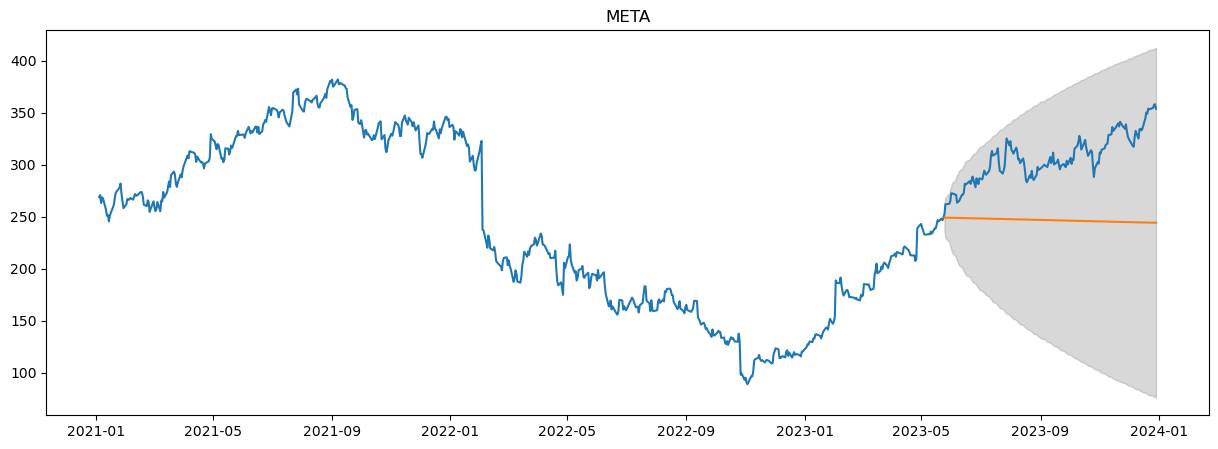

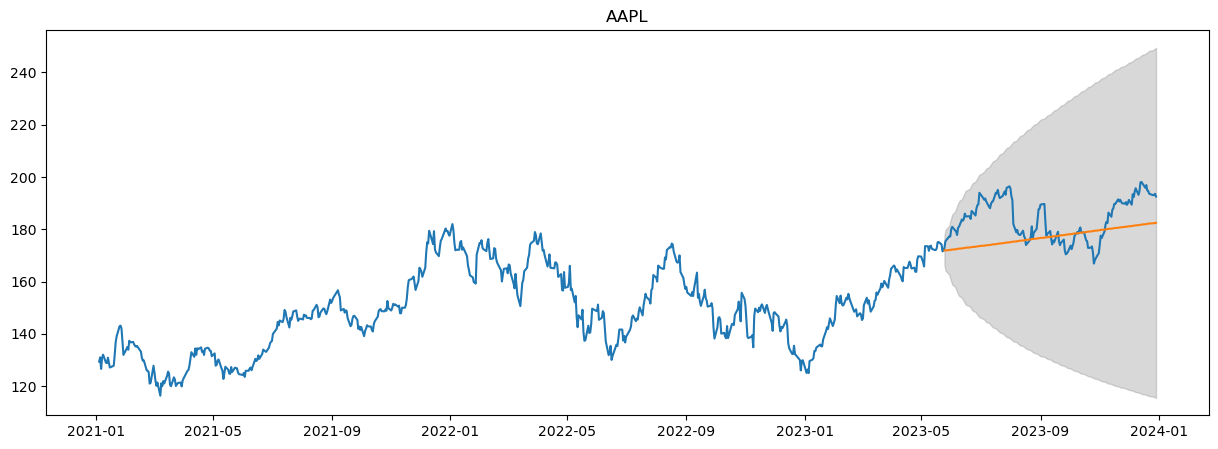

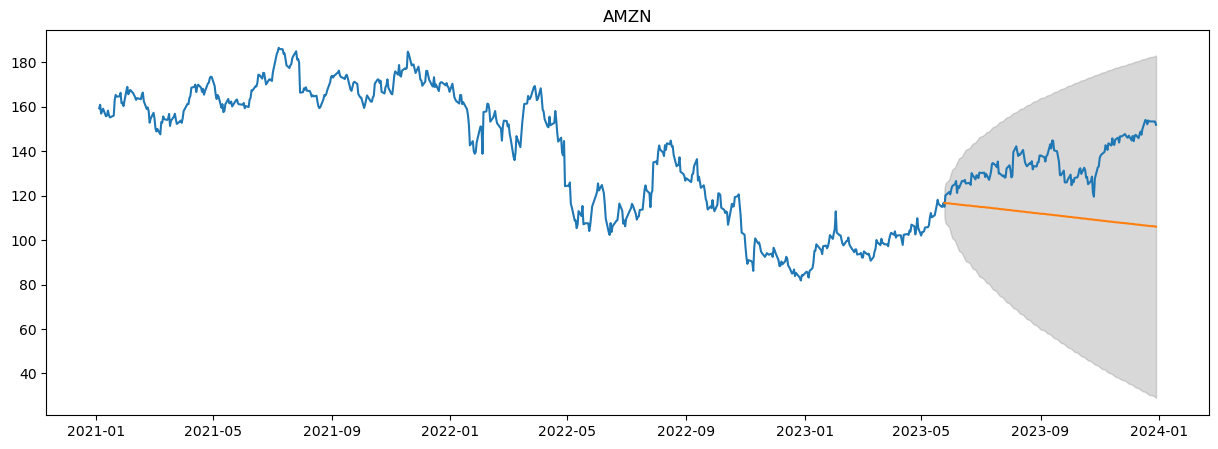

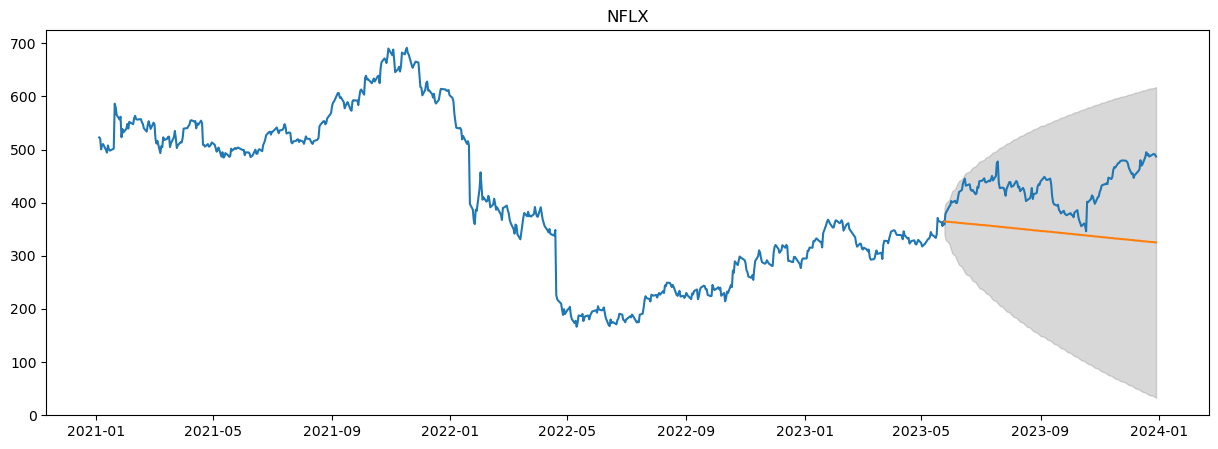

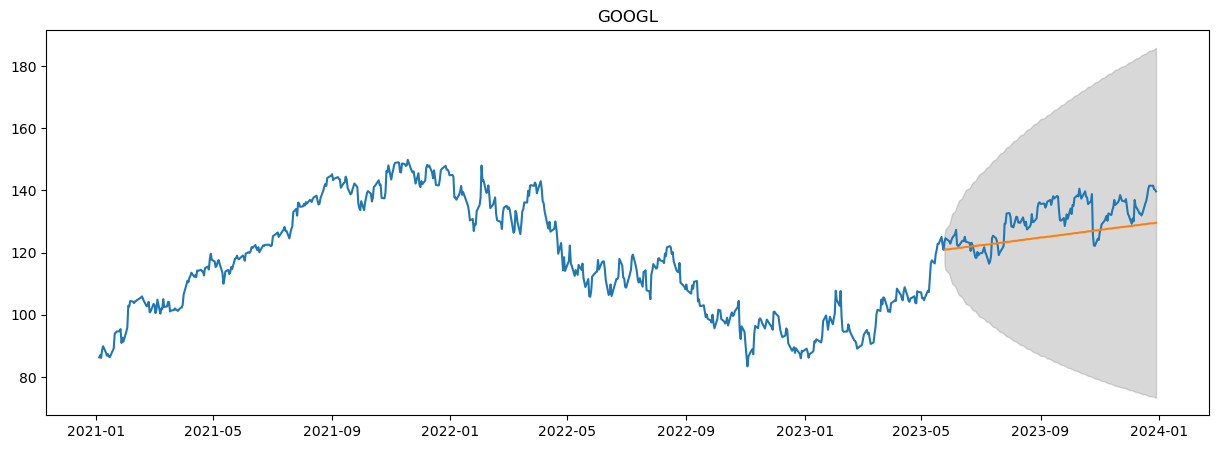

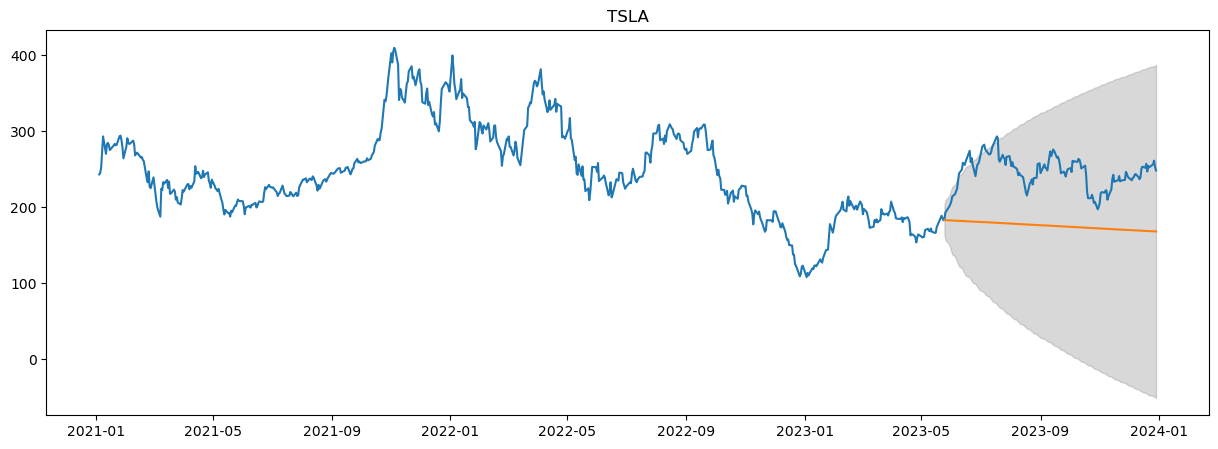

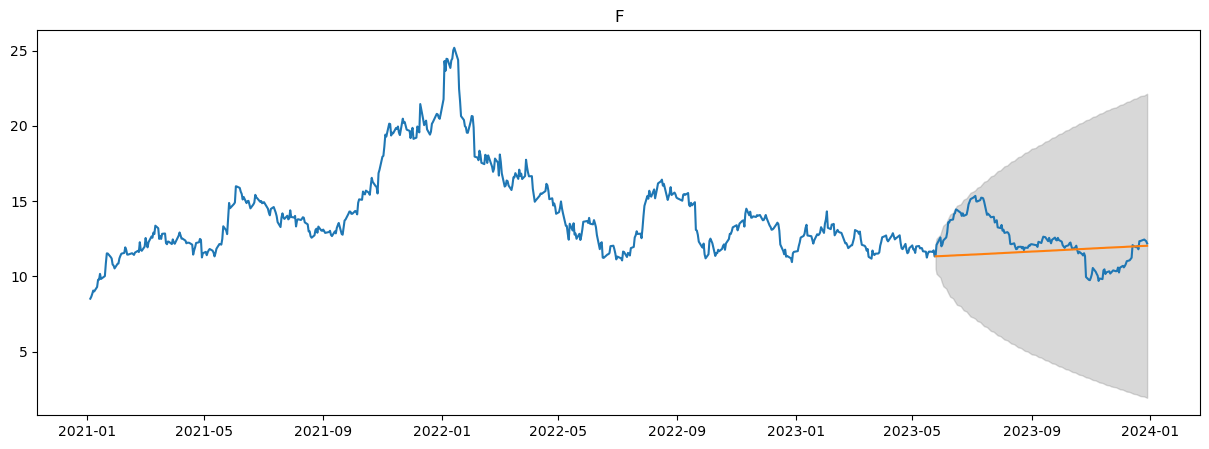

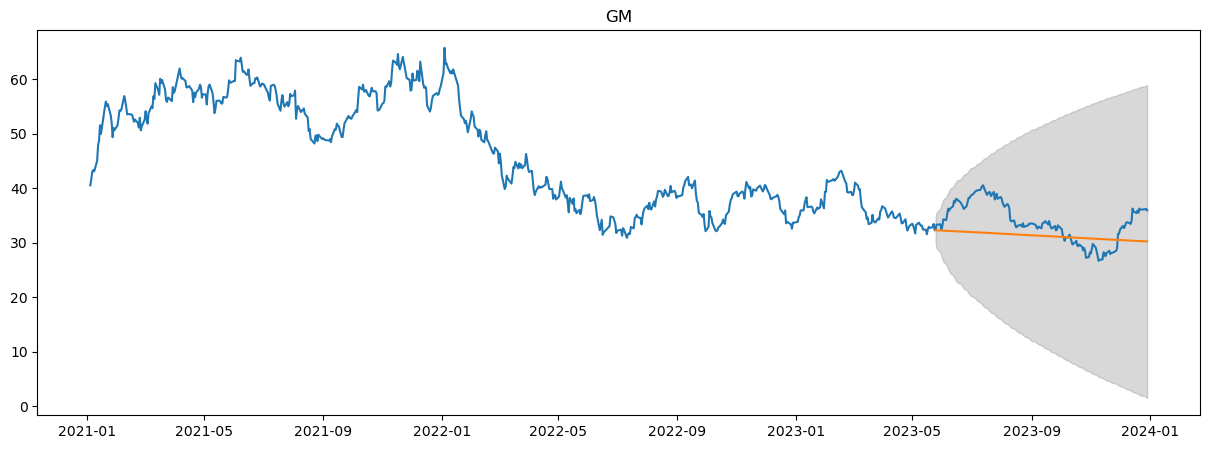

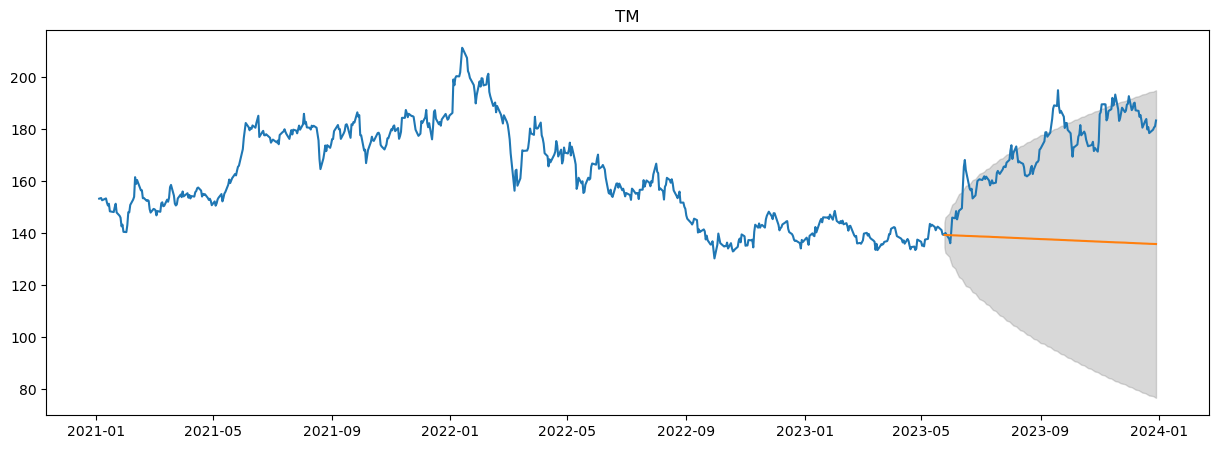

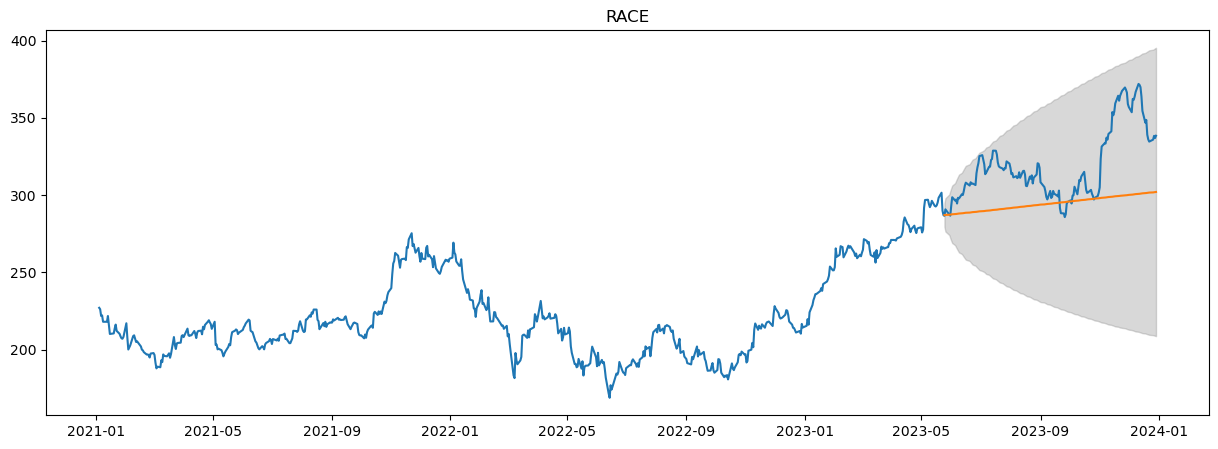

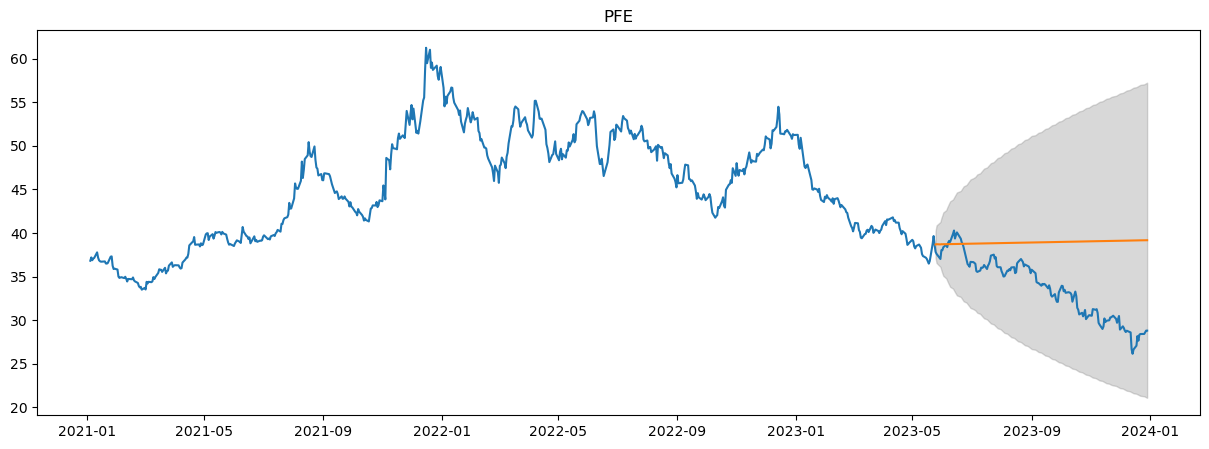

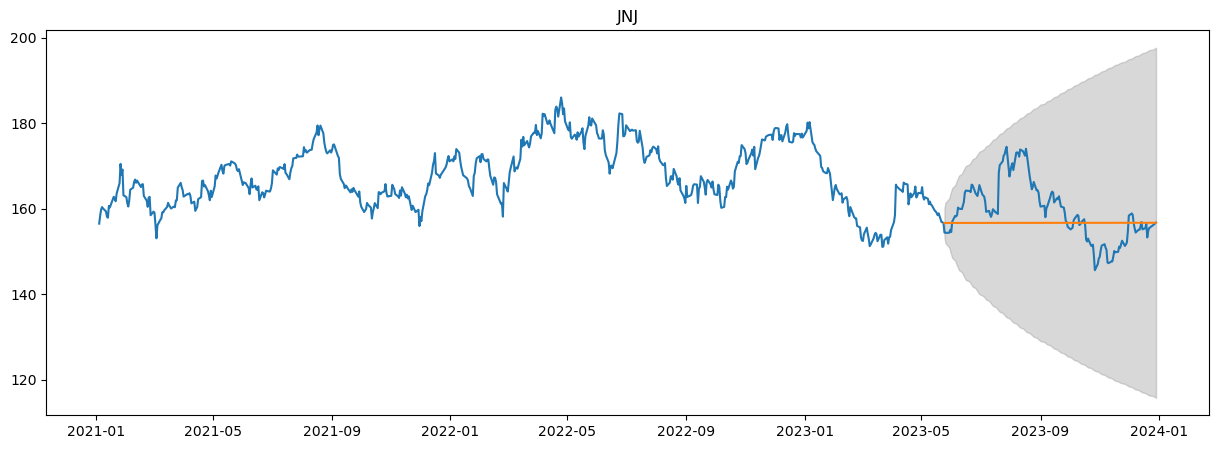

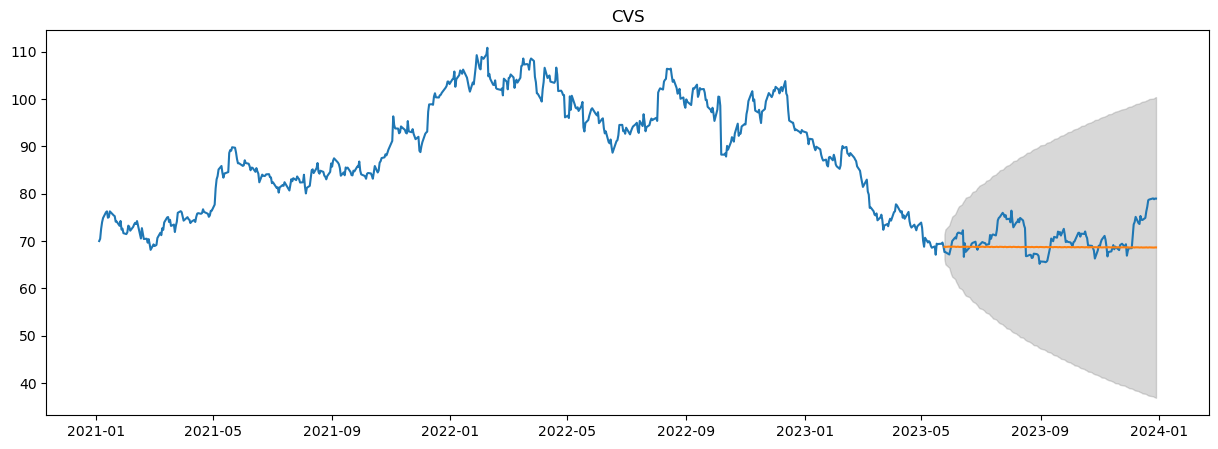

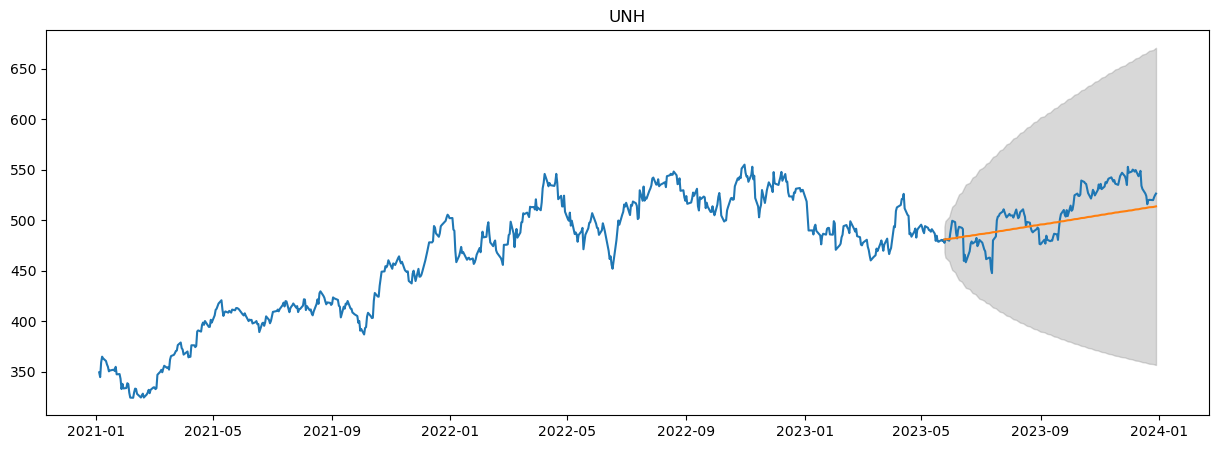

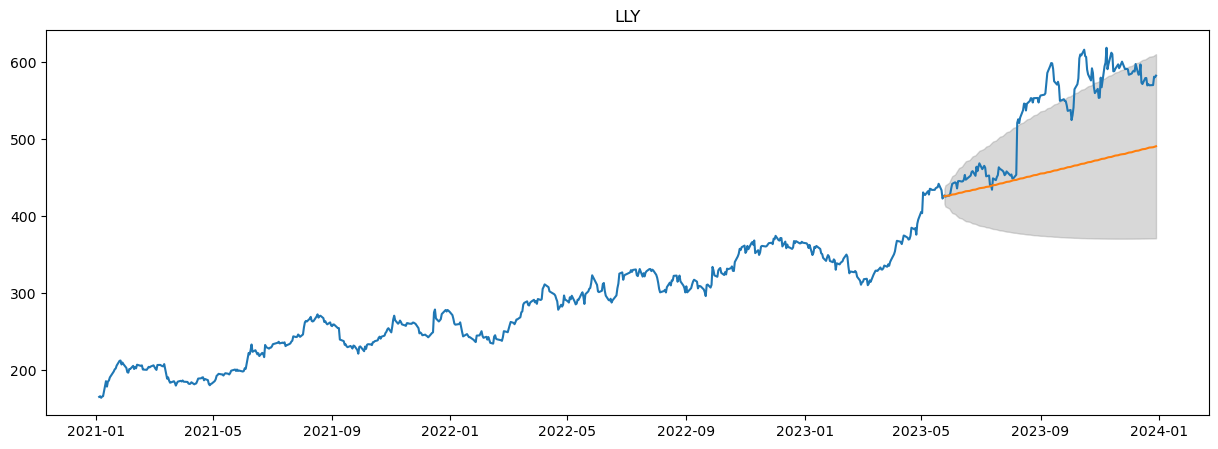

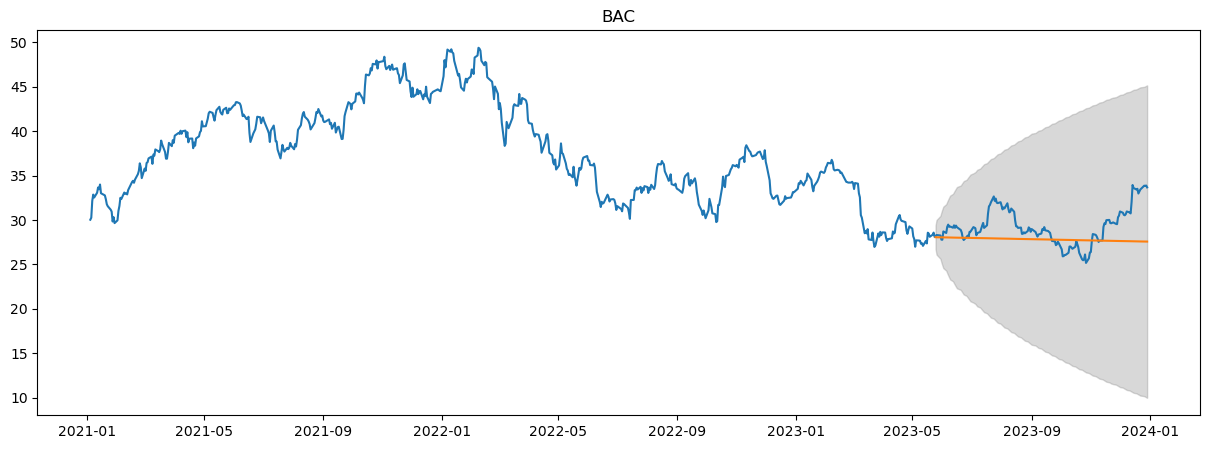

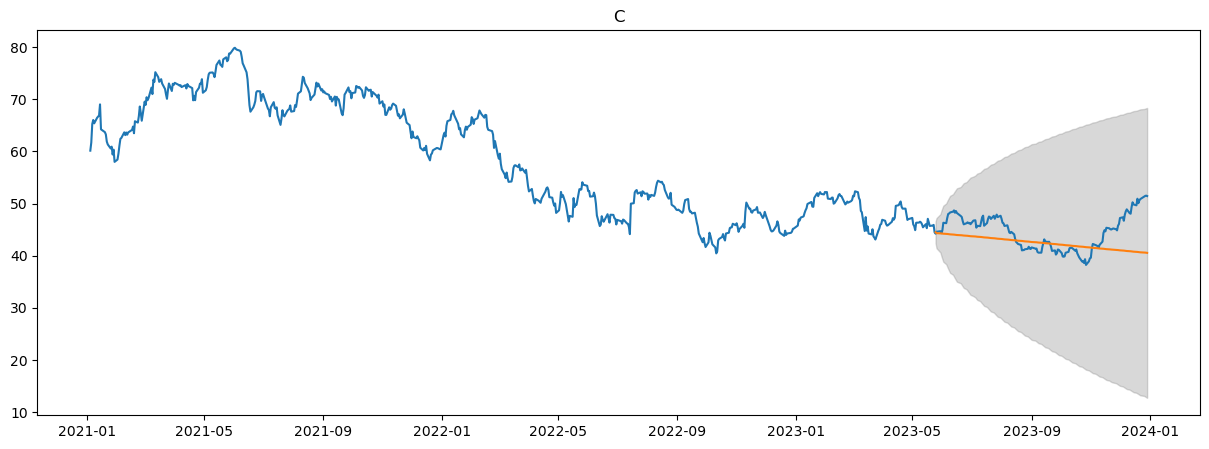

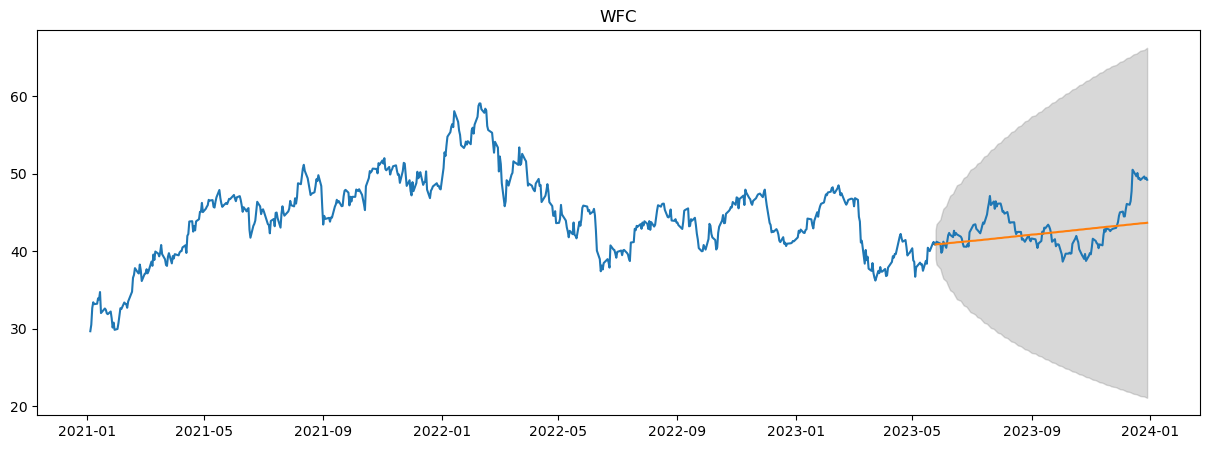

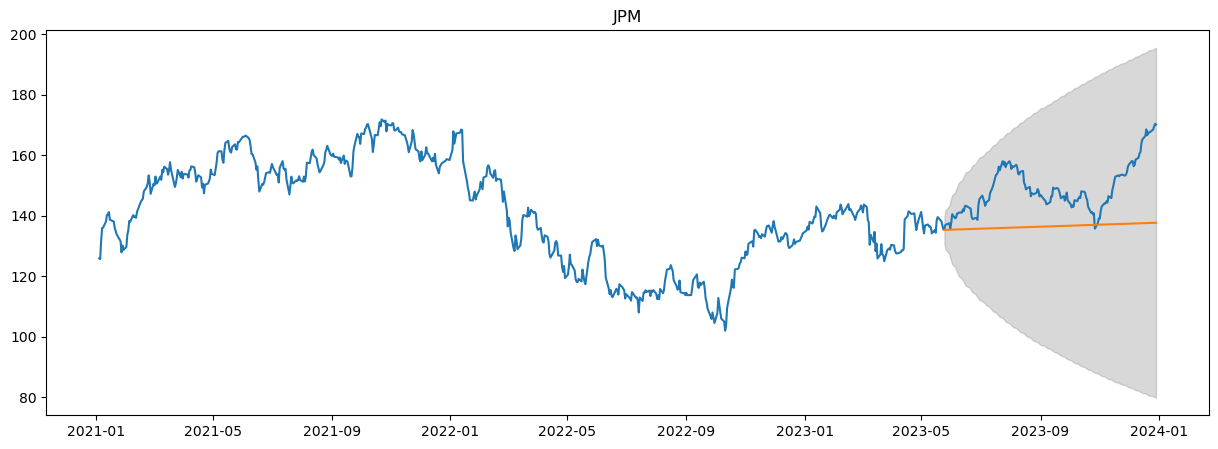

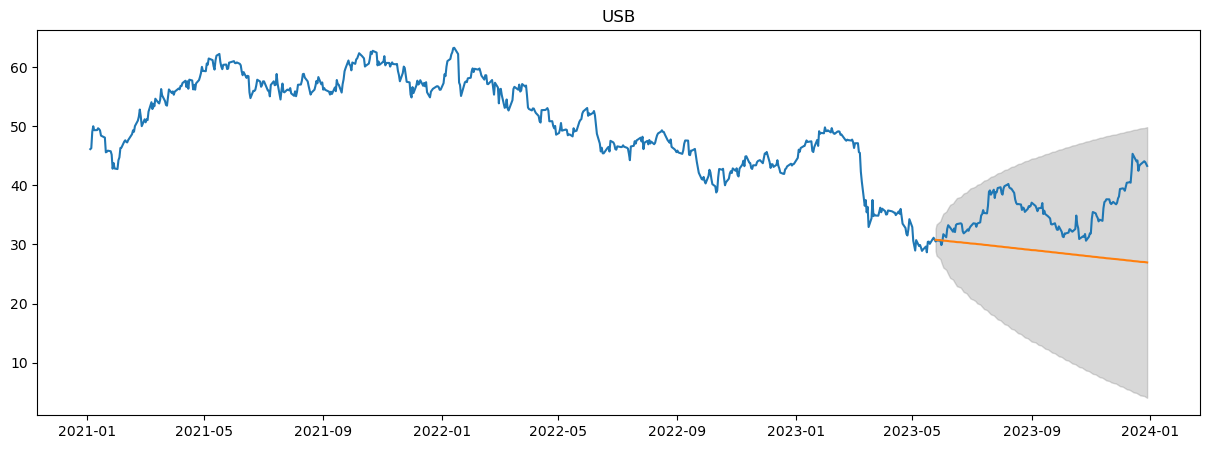

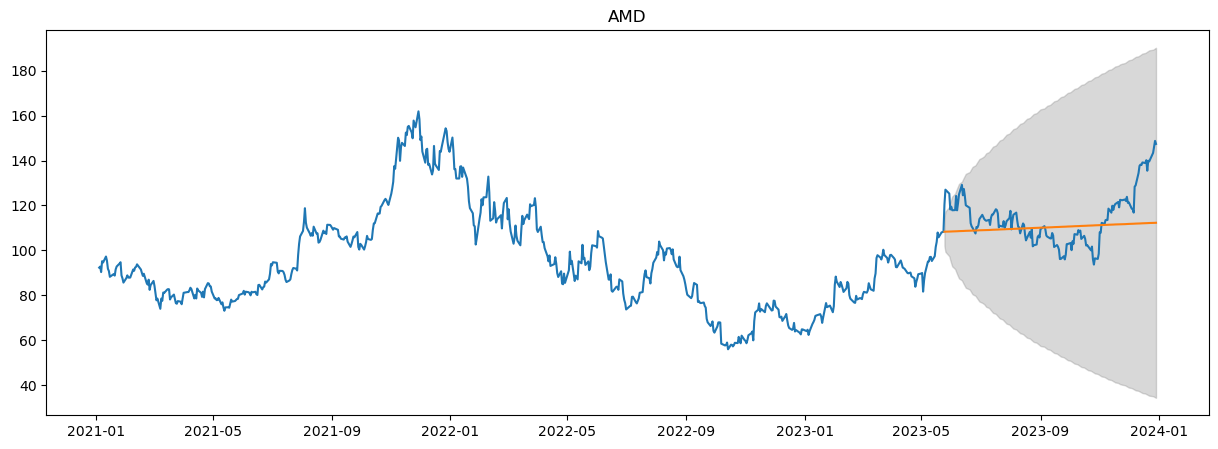

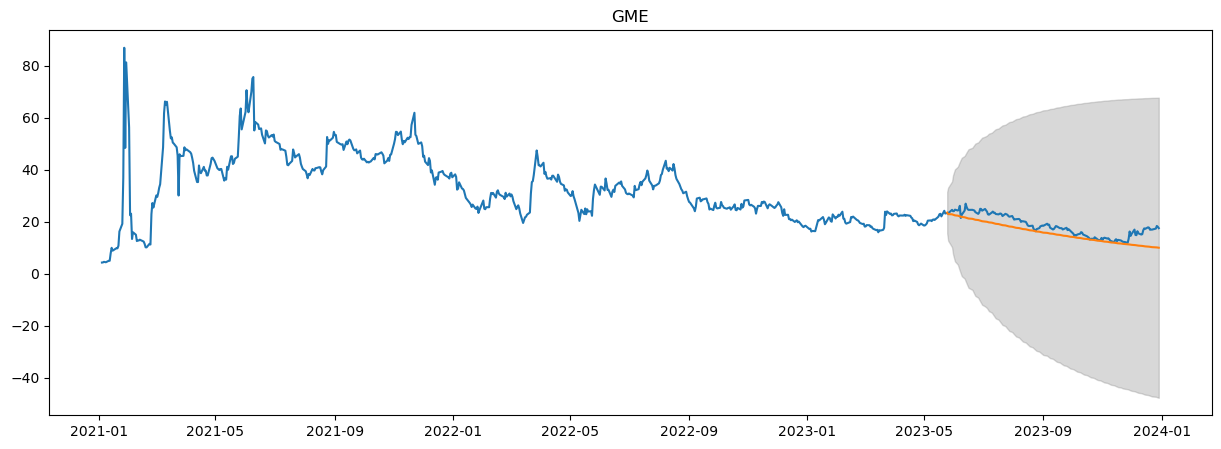

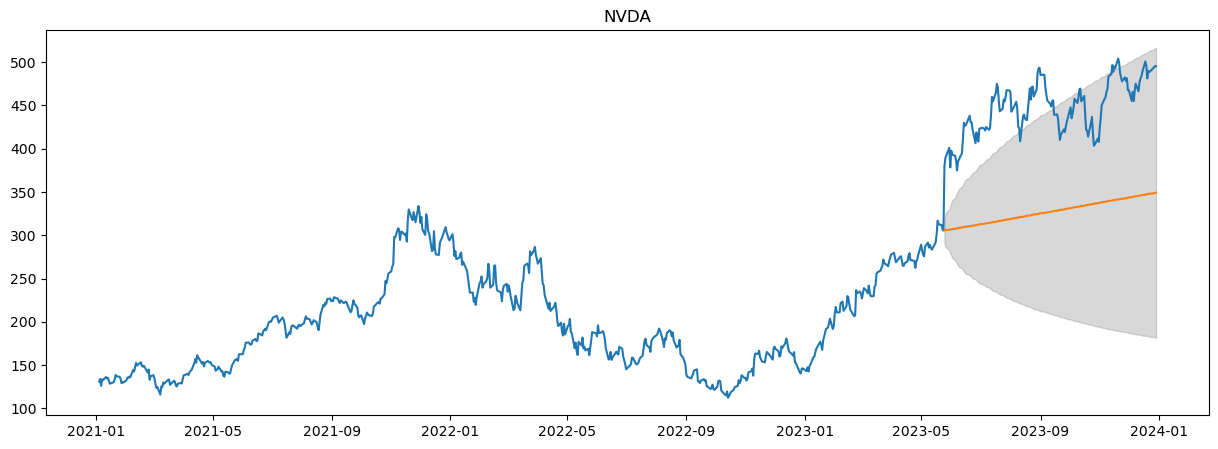

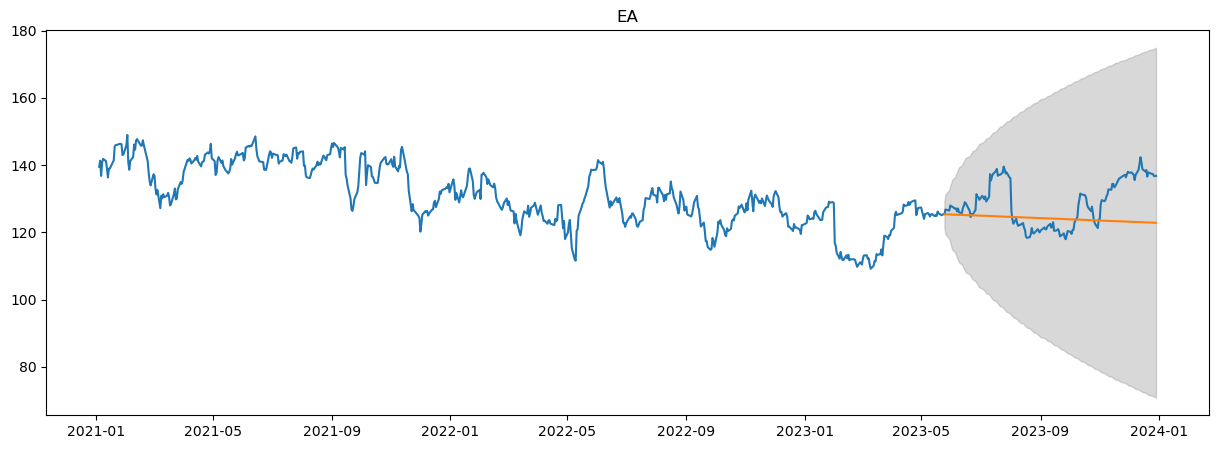

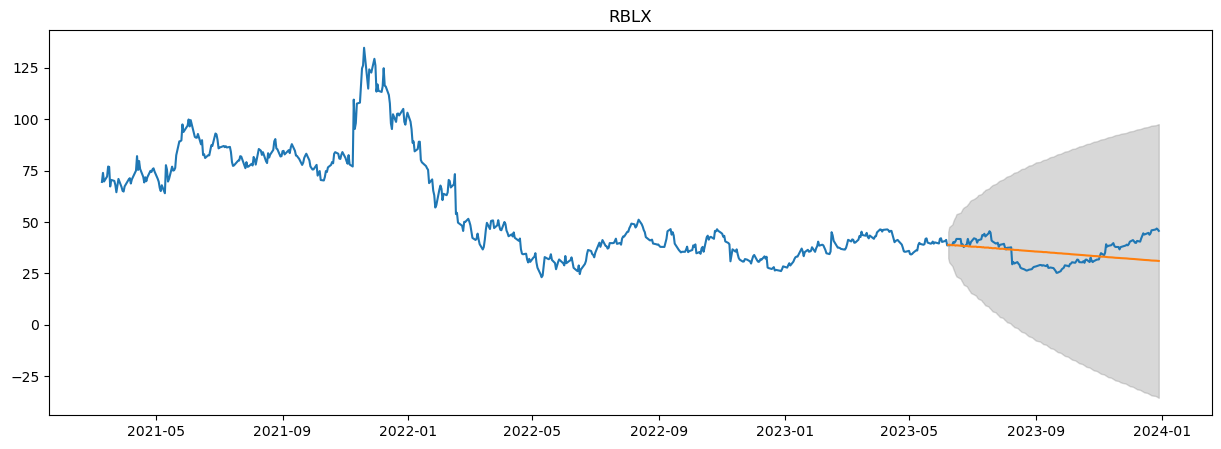

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

diff = {}

for stock in stockDataClose:
    chosen = stockDataClose[stock]

    chosen = chosen.set_index('Date')
    
    train_size = int(len(chosen) * .8)
    train_data, test_data = chosen[:train_size], chosen[train_size:]
    
    print('\nARIMA model for ' + stock)
    
    model = auto_arima(train_data, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=7,             
                      d=None,          
                      seasonal=False,   
                      #start_P=1, start_Q=1,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)
    #model = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True, start_p=1, start_q=1,stepwise=False,seasonal=False)
    #p,d,q = model.order
    #print(model.order)
    #orders[stock] = model.order
    prediction, confint = model.predict(n_periods=test_data.shape[0], return_conf_int=True)
    cf= pd.DataFrame(confint)
    
    prediction_series = pd.Series(prediction.values,index=test_data.index)
    #print(prediction_series)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(chosen['Close'])
    ax.plot(prediction_series)
    ax.set_title(stock)
    ax.fill_between(prediction_series.index,
                    cf[0],
                    cf[1],color='grey',alpha=.3)
    
    diff[stock] = (prediction.iloc[len(prediction) - 1] - prediction.iloc[0]) / abs(prediction.iloc[0]) * 100
    

In [7]:
# print out diff dict
diff_desc = dict(sorted(diff.items(), key=lambda item: item[1], reverse=True))

print('Stock Outlook\n')
for key, value in diff_desc.items():
    print(str(key) + ': \t' + str(round(value, 2)) + '%')

Stock Outlook

LLY: 	15.24%
NVDA: 	14.23%
GOOGL: 	7.14%
WFC: 	6.82%
UNH: 	6.81%
F: 	6.19%
AAPL: 	6.16%
RACE: 	5.21%
AMD: 	3.68%
JPM: 	1.74%
PFE: 	1.25%
JNJ: 	0.03%
CVS: 	-0.18%
BAC: 	-1.74%
META: 	-1.98%
EA: 	-2.02%
TM: 	-2.5%
GM: 	-6.37%
TSLA: 	-8.08%
C: 	-8.88%
AMZN: 	-9.11%
NFLX: 	-10.82%
USB: 	-12.41%
RBLX: 	-19.97%
GME: 	-57.42%


In [8]:
tech = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']
cars = ['TSLA', 'F', 'GM', 'TM', 'RACE']
health = ['PFE', 'JNJ', 'CVS', 'UNH', 'LLY']
finance = ['BAC', 'C', 'WFC', 'JPM', 'USB']
games = ['AMD', 'GME', 'NVDA', 'EA', 'RBLX']

In [9]:
techStocks = {key: diff[key] for key in tech}
carStocks = {key: diff[key] for key in cars}
healthStocks = {key: diff[key] for key in health}
financeStocks = {key: diff[key] for key in finance}
gameStocks = {key: diff[key] for key in games}

print('Tech Outlook: ' + str(round(sum(techStocks.values()) / len(techStocks), 2)) + '%')
print('Cars Outlook: ' + str(round(sum(carStocks.values()) / len(carStocks), 2)) + '%')
print('Health Outlook: ' + str(round(sum(healthStocks.values()) / len(healthStocks), 2)) + '%')
print('Finance Outlook: ' + str(round(sum(financeStocks.values()) / len(financeStocks), 2)) + '%')
print('Games Outlook: ' + str(round(sum(gameStocks.values()) / len(gameStocks), 2)) + '%')

Tech Outlook: -1.72%
Cars Outlook: -1.11%
Health Outlook: 4.63%
Finance Outlook: -2.9%
Games Outlook: -12.3%


## Conclusion

Our models have slightly indicated that our health stocks overall have the best outlook in the future. This does not guarentee that all health sector stocks will go up though. LLY or Eli Lilly And Co seems to have the best future right now while GameStop seems to be on the heavy decline.

Many of the stocks were not easy to predict. We need to fine tune our model as auto ARIMA was not able to find a pattern.